<a href="https://colab.research.google.com/github/andersonvalentim/API-Algoritms-resolutions-/blob/master/Analise_de_dados_Logshell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Análise de dados de endereços IP's utilizados no ataque Log4Shell**


Log4Shell é o nome atribuido a vulnerabilidade encontrada no componente  de software Java chamado Log4j. Esse componente está incorporado em diversos aplicativos, onde seu intuito principal é gerar insumo de logs. A vulnerabilidade  explorada na [CVE-2021-44228](https://cve.mitre.org/cgi-bin/cvename.cgi?name=cve-2021-44228), explora remotamente alvos vulneráveis e obtém  acesso não autorizado aos sistemas que fazem a utilização do componetne Log4j.

Origem do DataSet analisado:
[Kaggle](https://www.kaggle.com/datasets/brsdincer/log4shell-attack-ip-informations)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import geopandas



In [2]:
df = pd.read_csv('/home/LOG4SHELL_IP_INFO - Sheet1.csv')

df.head()

,IP_INFO,STATUS_CONF,COUNTRY,PL_NAME
0,195.54.160.149,validated,RU,OOO Network of data-centers Selectel
1,45.155.205.233,validated,RU,OOO Network of data-centers Selectel
2,167.71.13.196,validated,NL,DIGITALOCEAN-ASN
3,45.146.164.160,validated,RU,OOO Network of data-centers Selectel
4,34.65.121.142,validated,CH,GOOGLE-CLOUD-PLATFORM


**Analisando o conjunto de dados**

In [3]:
df.describe()

,IP_INFO,STATUS_CONF,COUNTRY,PL_NAME
count,2111,2111,2111,2110
unique,2111,4,60,272
top,195.54.160.149,benign,DE,Alpha Strike Labs GmbH
freq,1,1028,1239,1022


Baseando-se na amostra acima, temos as seguintes informações coletadas:

*   2111 endereços IP's únicos
*   60 paises foram identificados 
*   272 provedores em nuvem foram identificados
*    4 status para os IP's




***Lista de países dos IP's que realizaram o ataque***

In [ ]:
df['COUNTRY'].unique()

array(['RU', 'NL', 'CH', 'GR', 'BR', 'IN', 'US', 'TW', 'SG', 'AR', 'CN',
       'GB', 'DE', 'SA', 'TH', 'PL', 'SE', 'HU', 'KR', 'BD', 'PH', 'EG',
       'HK', 'CA', 'FR', 'MX', 'LU', 'RO', 'SC', 'TR', 'DK', 'UA', 'PE',
       'FI', 'IE', 'JP', 'BG', 'ES', 'ID', 'BE', 'CZ', 'CY', 'KZ', 'BY',
       'ZA', 'DZ', 'VN', 'CL', 'AL', 'SK', 'CO', 'MY', 'AU', 'IR', 'MD',
       'PA', 'EE', 'NO', 'IT', 'AT'], dtype=object)

**Provedores utilizadores para realização do ataque**

In [ ]:
df['PL_NAME'].unique()

array(['OOO Network of data-centers Selectel', 'DIGITALOCEAN-ASN',
       'GOOGLE-CLOUD-PLATFORM',
       'National Infrastructures for Research and Technology S.A.',
       'MICROSOFT-CORP-MSN-AS-BLOCK', 'CDSC-AS1',
       'Red de Interconexion Universitaria',
       'Hangzhou Alibaba Advertising Co.,Ltd.',
       'China Unicom Beijing Province Network',
       'CHINA UNICOM China169 Backbone',
       'Shenzhen Tencent Computer Systems Company Limited',
       'myLoc managed IT AG', 'PHMGMT-AS1',
       'China Mobile communications corporation',
       'The Communication Authoity of Thailand, CAT',
       'Riviera Telecom Ltd', 'Hengyang', 'PJSC MegaFon', 'Linode, LLC',
       'Uzbektelekom Joint Stock Company', 'Inter Connects Inc',
       'SzerverPlex.hu KFT.', 'ORACLE-BMC-31898',
       'RootLayer Web Services Ltd.', 'AS-CHOOPA', 'Contabo GmbH',
       'WEBLINE19', 'Hetzner Online GmbH',
       'IP-Converge Data Center, Inc.', 'Noor Data Networks',
       'FNL-33-19754', 'OVH SAS',

**Limpeza de dados**

Encontrando colunas com valores nulos



In [ ]:
df.isnull().sum()

IP_INFO        0
STATUS_CONF    0
COUNTRY        0
PL_NAME        1
dtype: int64

Remoção de valores nulos

In [ ]:
#remoção de valor nulo
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

IP_INFO        0
STATUS_CONF    0
COUNTRY        0
PL_NAME        0
dtype: int64


***Agrupando dados para análise***



In [ ]:
#Agrupando os 10 paises com maior incidencias de tuplas 
paises=df.groupby(["COUNTRY"]).size().sort_values(ascending=False).head(10)

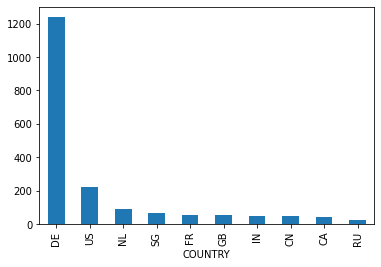

In [ ]:
#plotando o gráfico de análise
paises.plot(kind='bar')

In [ ]:
#Agrupando dados das 10 principais plataformas utilizadas para realizar os ataques
plataformas=df.groupby(["PL_NAME"]).size().sort_values(ascending=False).head(10)

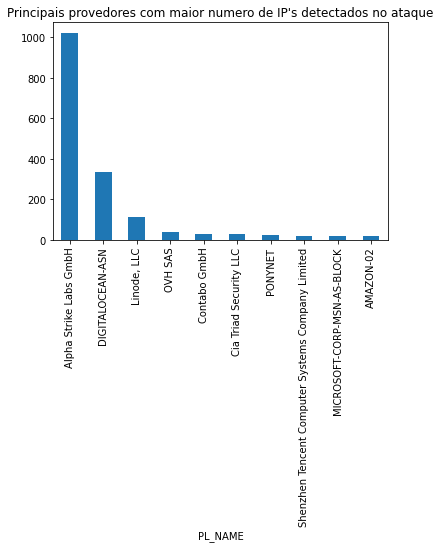

In [ ]:
#plotando o gráfico de análise
plataformas.plot(kind='bar', title="Principais provedores com maior numero de IP's detectados no ataque")

In [5]:
## Agrupando  IP's verificados como maliciosos

verificado = df.loc[df['STATUS_CONF'] == 'validated']

verificado.head()

,IP_INFO,STATUS_CONF,COUNTRY,PL_NAME
0,195.54.160.149,validated,RU,OOO Network of data-centers Selectel
1,45.155.205.233,validated,RU,OOO Network of data-centers Selectel
2,167.71.13.196,validated,NL,DIGITALOCEAN-ASN
3,45.146.164.160,validated,RU,OOO Network of data-centers Selectel
4,34.65.121.142,validated,CH,GOOGLE-CLOUD-PLATFORM
